# LOGISTIC REGRESSION IMPLEMENTATION FROM SCRATCH!!!

**Logistic Regression** is a classification algorithm. It is derived from a linear regression line by restricting the range to 0 to 1 and converting it into a sigmoid curve.

We know, linear regression has the following equation : 

**y = mx + c**

We can convert it to a sigmoid curve by using the following formula : 

**y = 1/(1 + e^(-(mx + c)))** or **y = 1/(1 + e^(-y))**

Sigmoid curve is a s-shaped curve used to determine the probability of an event. In logistic regression, basically we have two classes (1 or 0) to classify our data into and hence is also know as binary classification algorithm. The sigmoid curve provides us the probability. If the probability is **>=0.5** (i.e, threshold value) we classify the data as 1, 0 otherwise. 

To begin with, we first import the dependencies and store the dataset int a variable named df. Here, we use the **Breast Cancer Type Prediction Dataset** downloaded from kaggle.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
up = files.upload()

Saving Breast Cancer Type Pred.csv to Breast Cancer Type Pred.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(up['Breast Cancer Type Pred.csv']))
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Now, that we have imported the data, we start processing the data, i.e, **DATA WRANGLING**.

First we drop the 'Unnamed: 32' column as it has mostly null values.

In [4]:
df['Unnamed: 32'].isnull().value_counts()

True    569
Name: Unnamed: 32, dtype: int64

Next, we encode the 'diagnosis' columns and concat it to the original data. We also drop columns of less significance along with 'diagnosis' column.

In [5]:
dia = pd.get_dummies(df['diagnosis'], drop_first = True)
df = pd.concat([df, dia], axis = 1)

df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis = 1, inplace = True)

df.dropna(inplace = True)

df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


At the end we have the target column - 'M' - which if 1 indicates that the tumor is malignant and and begnin if 0.

Now, we create a function called **dataset_minmax()** which finds out the minumum and maximum vakues of our data and returns a list containing the minimum element at index 0 and maximum element at index 1.

Variable Description: 

**d** = dataset

**r** = row values of the dataset

**m** = list storing the extremum values

**col_values** = stores a column

**value_min** = stores the minimum value

**value_max** = stores the max value

In [6]:
def minmax(d):
	m = list()
	for i in range(len(d[0])):
		col_values = [r[i] for r in d]
		value_min = min(col_values)
		value_max = max(col_values)
		m.append([value_min, value_max])
	return m

Then, we create a function **normalize_dataset()** to normalize our data. We do so, in order for the gradient update function to work correctly.

In [7]:
def normalize(d, m):
	for r in d:
		for i in range(len(r)):
			r[i] = (r[i] - m[i][0]) / (m[i][1] - m[i][0])

Moving on we convert our data into array and find out our min and max values. And then we finally normalize our dataset.

In [8]:
df = np.array(df)
m = minmax(df[:,:-1])
normalize(df[:,:-1], m)

And next, we split our dataset into train and test dataset.

Variable Description:

**dtr** = training dataset

**dte** = testing dataset

In [9]:
dtr, dte = train_test_split(df, test_size = 0.33)

In [10]:
print(dtr.shape, dte.shape)

(381, 31) (188, 31)


Now, we create a function called **predict()** which will make predictions for our dataset.

Variable Description:

**r** = a row from our dataset

**coeff** = linear regression coefficients for our dataset

**y** = stores the value for the linear regression equation for our dataset

In [11]:
def predict(r, coeff):
	y = coeff[0]
	for i in range(len(r)-1):
		y += coeff[i + 1] * r[i]
	return 1.0 / (1.0 + np.exp(-y))

To upgrade our coefficients we create a function **coeff_grad_update()**.

Variable Coefficients:

**train** = training dataset

**coef** = stores the coefficients of linear regression for our data

**learning_rate** = custom intitialised variable to fix the rate of change of coefficients

**epoch** = custom initialised variable to fix the number of iterations

In [12]:
def coeff_grad_update(train, learning_rate, epoch):
	coef = [0.0 for i in range(len(train[0]))]
	for e in range(epoch):
		for r in train:
			y = predict(r, coef)
			error = r[-1] - y
			coef[0] = coef[0] + learning_rate * error * y * (1.0 - y)
			for i in range(len(r)-1):
				coef[i + 1] = coef[i + 1] + learning_rate * error * y * (1.0 - y) * r[i]
	return coef

Now, finally we create the **logistic_regression()** function to fir our data and make predictions,

Variable Description:

**test** = testing dataset

**predictions** = stores the predictions made

In [13]:
def logistic_regression(train, test, learning_rate, epoch):
	predictions = list()
	coef = coeff_grad_update(train, learning_rate, epoch)
	for r in test:
		y = predict(r, coef)
		y = round(y)
		predictions.append(y)
	return(predictions)

In [14]:
pred = logistic_regression(dtr, dte, 0.1, 100)

Now that we have the predictions we check the quality of our MODEL!!!

## CONFUSION MATRIX

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
y_true = dte[:,-1]
cm = confusion_matrix(y_true, pred)

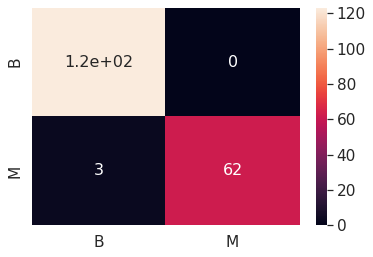

In [17]:
titles = ['B', 'M']

df_cm = pd.DataFrame(cm, index = titles, columns = titles)

sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})

plt.show()

## CLASSIFICATION REPORT

In [18]:
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       123
         1.0       1.00      0.95      0.98        65

    accuracy                           0.98       188
   macro avg       0.99      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



We observe that our model is working with a high rate of efficiency! We can use the above model for various classification dataset!

# Thank You!!!